In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('./train.csv')
data

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

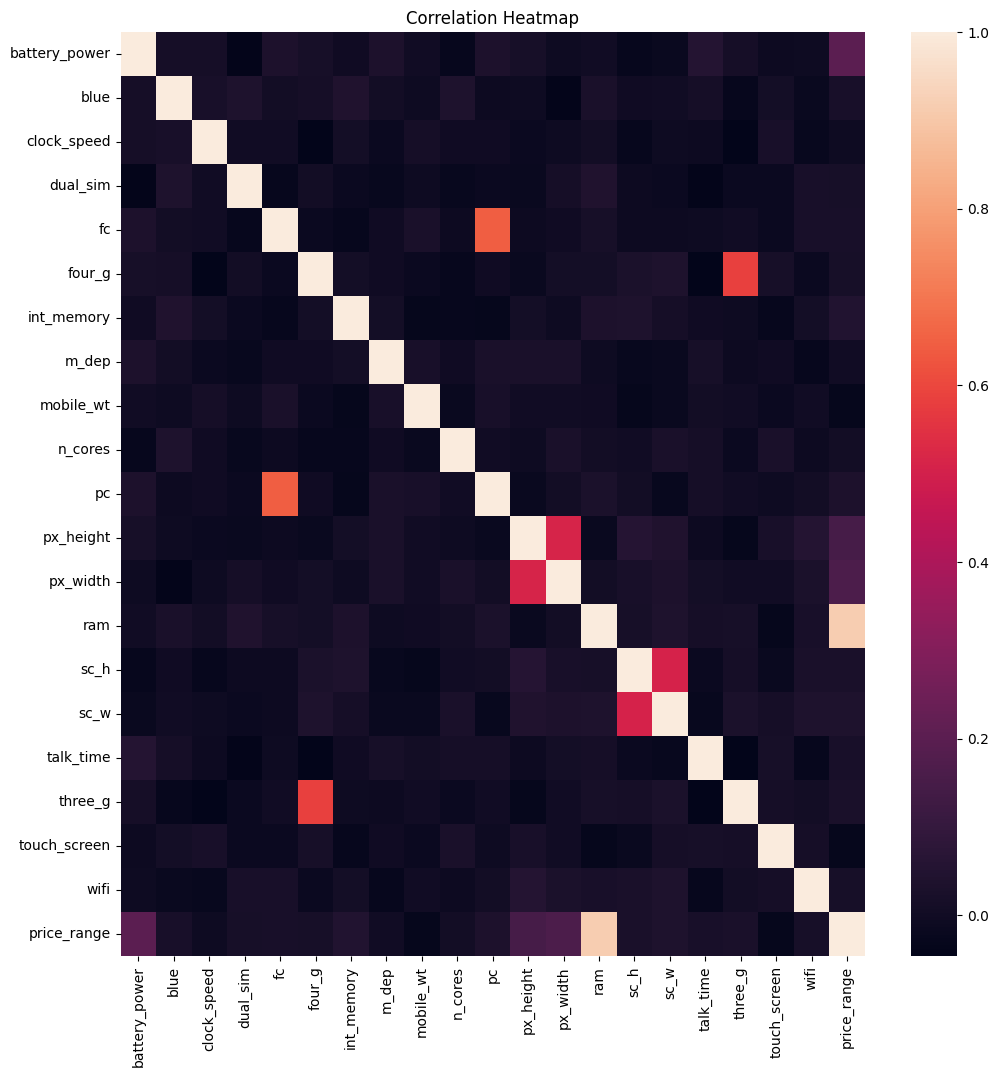

In [4]:
plt.figure(figsize=(12,12))

sns.heatmap(data.corr())

plt.title('Correlation Heatmap')
plt.show()

In [9]:
data['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [7]:
X = data.drop(columns=['price_range'])
y = data['price_range']

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### LOGISTIC REGRESSION 

##### NO penalty

In [28]:
from sklearn.linear_model import LogisticRegression

log_none_model = LogisticRegression(penalty=None)

log_none_model.fit(X_train, y_train)

ytrain_log_none_pred = log_none_model.predict(X_train)
ytest_log_none_pred = log_none_model.predict(X_test)


In [10]:
from sklearn.metrics import confusion_matrix, classification_report

In [121]:
print('Train Report\n', classification_report(y_train, ytrain_log_none_pred))
print('Test Report\n', classification_report(y_test, ytest_log_none_pred))

print('Train Confusion \n', confusion_matrix(y_train, ytrain_log_none_pred))
print('Test Confusion \n', confusion_matrix(y_test, ytest_log_none_pred))

Train Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       0.99      0.99      0.99       400
           2       0.99      0.99      0.99       400
           3       1.00      1.00      1.00       400

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

Test Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       100
           1       0.98      0.96      0.97       100
           2       0.94      0.97      0.96       100
           3       0.98      0.97      0.97       100

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

Train Confusion 
 [[400   0   0   0]
 [  0 397   3   0]
 [  0   3 396   1]
 [  0   0   0 400]]
Test Con

In [27]:
from sklearn.model_selection import GridSearchCV

### NAIVEBAYES

In [12]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB

#### BernoulliNB

In [50]:

bern_model = BernoulliNB()

bern_model.fit(X_train, y_train)

ytrain_bern_pred = bern_model.predict(X_train)
ytest_bern_pred = bern_model.predict(X_test)

In [41]:
print('Train Report\n', classification_report(y_train, ytrain_bern_pred))
print('Test Report\n', classification_report(y_test, ytest_bern_pred))

print('Train Confusion \n', confusion_matrix(y_train, ytrain_bern_pred))
print('Test Confusion \n', confusion_matrix(y_test, ytest_bern_pred))

Train Report
               precision    recall  f1-score   support

           0       0.62      0.72      0.67       400
           1       0.50      0.41      0.46       400
           2       0.55      0.49      0.52       400
           3       0.65      0.73      0.69       400

    accuracy                           0.59      1600
   macro avg       0.58      0.59      0.58      1600
weighted avg       0.58      0.59      0.58      1600

Test Report
               precision    recall  f1-score   support

           0       0.62      0.68      0.65       100
           1       0.45      0.39      0.42       100
           2       0.48      0.44      0.46       100
           3       0.62      0.70      0.66       100

    accuracy                           0.55       400
   macro avg       0.54      0.55      0.55       400
weighted avg       0.54      0.55      0.55       400

Train Confusion 
 [[290 110   0   0]
 [162 166  53  19]
 [ 14  53 195 138]
 [  0   0 106 294]]
Test Con

#### GaussianNB

In [52]:
gaus_model = GaussianNB()

gaus_model.fit(X_train, y_train)

ytrain_gaus_pred = gaus_model.predict(X_train)
ytest_gaus_pred = gaus_model.predict(X_test)

In [53]:
print('Train Report\n', classification_report(y_train, ytrain_gaus_pred))
print('Test Report\n', classification_report(y_test, ytest_gaus_pred))

print('Train Confusion \n', confusion_matrix(y_train, ytrain_gaus_pred))
print('Test Confusion \n', confusion_matrix(y_test, ytest_gaus_pred))

Train Report
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       400
           1       0.74      0.74      0.74       400
           2       0.73      0.74      0.74       400
           3       0.90      0.89      0.90       400

    accuracy                           0.82      1600
   macro avg       0.82      0.82      0.82      1600
weighted avg       0.82      0.82      0.82      1600

Test Report
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       100
           1       0.71      0.69      0.70       100
           2       0.70      0.73      0.71       100
           3       0.91      0.92      0.92       100

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400

Train Confusion 
 [[362  38   0   0]
 [ 37 295  68   0]
 [  0  64 297  39]
 [  0   1  43 356]]
Test Con

### KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)

ytrain_knn_pred = knn_model.predict(X_train)
ytest_knn_pred = knn_model.predict(X_test)

In [148]:
print('Train Report\n', classification_report(y_train, ytrain_knn_pred))
print('Test Report\n', classification_report(y_test, ytest_knn_pred))

print('Train Confusion \n', confusion_matrix(y_train, ytrain_knn_pred))
print('Test Confusion \n', confusion_matrix(y_test, ytest_knn_pred))

Train Report
               precision    recall  f1-score   support

           0       0.73      0.86      0.79       400
           1       0.60      0.62      0.61       400
           2       0.63      0.63      0.63       400
           3       0.87      0.69      0.77       400

    accuracy                           0.70      1600
   macro avg       0.71      0.70      0.70      1600
weighted avg       0.71      0.70      0.70      1600

Test Report
               precision    recall  f1-score   support

           0       0.65      0.70      0.67       100
           1       0.34      0.39      0.36       100
           2       0.40      0.42      0.41       100
           3       0.72      0.52      0.60       100

    accuracy                           0.51       400
   macro avg       0.53      0.51      0.51       400
weighted avg       0.53      0.51      0.51       400

Train Confusion 
 [[346  49   5   0]
 [101 247  43   9]
 [ 23  92 252  33]
 [  2  25  99 274]]
Test Con

##### Hyperparameter Tuning

In [144]:
knn_params = {
    'n_neighbors': [1,2,3,4],
    'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto']
}

knn_grid = GridSearchCV(knn_model, knn_params, cv=5, scoring='recall').fit(X_train, y_train)

print(knn_grid.best_score_, knn_grid.best_params_)

c:\Users\user\Desktop\code\python\Content\ML\Capstone\env\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\user\Desktop\code\python\Content\ML\Capstone\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\Desktop\code\python\Content\ML\Capstone\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\Desktop\code\python\Content\ML\Capstone\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._

nan {'algorithm': 'ball_tree', 'n_neighbors': 1}


c:\Users\user\Desktop\code\python\Content\ML\Capstone\env\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\user\Desktop\code\python\Content\ML\Capstone\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\Desktop\code\python\Content\ML\Capstone\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\Desktop\code\python\Content\ML\Capstone\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._

#### SVM

In [14]:
from sklearn.svm import SVC, LinearSVC

In [75]:
svc_model = SVC(kernel='poly', C=2)

svc_model.fit(X_train, y_train)

ytrain_svc_pred = svc_model.predict(X_train)
ytest_svc_pred = svc_model.predict(X_test)

In [76]:
print('Train Report\n', classification_report(y_train, ytrain_svc_pred))
print('Test Report\n', classification_report(y_test, ytest_svc_pred))

print('Train Confusion \n', confusion_matrix(y_train, ytrain_svc_pred))
print('Test Confusion \n', confusion_matrix(y_test, ytest_svc_pred))

Train Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       400
           1       0.98      0.98      0.98       400
           2       0.98      0.99      0.98       400
           3       1.00      0.99      0.99       400

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600

Test Report
               precision    recall  f1-score   support

           0       0.92      0.83      0.87       100
           1       0.70      0.78      0.74       100
           2       0.71      0.72      0.71       100
           3       0.89      0.85      0.87       100

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400

Train Confusion 
 [[395   5   0   0]
 [  2 392   6   0]
 [  0   3 396   1]
 [  0   0   4 396]]
Test Con

### Hyperparameter Tuning

In [154]:
svc_hyper_model = SVC()

svc_params = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3],
    'degree': [1,2,3,4]
}

svc_grid = GridSearchCV(svc_hyper_model, svc_params, cv=5, scoring='recall').fit(X_train, y_train)

print(svc_grid.best_score_, svc_grid.best_params_)

c:\Users\user\Desktop\code\python\Content\ML\Capstone\env\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\user\Desktop\code\python\Content\ML\Capstone\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\Desktop\code\python\Content\ML\Capstone\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\Desktop\code\python\Content\ML\Capstone\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._

nan {'C': 0.7, 'degree': 1, 'kernel': 'linear'}


c:\Users\user\Desktop\code\python\Content\ML\Capstone\env\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\user\Desktop\code\python\Content\ML\Capstone\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\Desktop\code\python\Content\ML\Capstone\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\Desktop\code\python\Content\ML\Capstone\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._

### Best SVC MODEL

In [15]:
best_svc_model = SVC(degree=1, kernel='linear', C=0.7)

best_svc_model.fit(X_train, y_train)

ytrain_trial_pred = best_svc_model.predict(X_train)
ytest_trial_pred = best_svc_model.predict(X_test)

print('Train Report\n', classification_report(y_train, ytrain_trial_pred))
print('Test Report\n', classification_report(y_test, ytest_trial_pred))

print('Train Confusion \n', confusion_matrix(y_train, ytrain_trial_pred))
print('Test Confusion \n', confusion_matrix(y_test, ytest_trial_pred))

Train Report
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       400
           1       0.97      0.95      0.96       400
           2       0.96      0.96      0.96       400
           3       0.98      0.99      0.98       400

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600

Test Report
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       100
           1       0.96      0.95      0.95       100
           2       0.94      0.94      0.94       100
           3       0.95      0.98      0.97       100

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400

Train Confusion 
 [[396   4   0   0]
 [  8 382  10   0]
 [  0   8 383   9]
 [  0   0   4 396]]
Test Con

### Linear SVC

In [161]:
linsvc_model = LinearSVC(C=1)

linsvc_model.fit(X_train, y_train)

ytrain_linsvc_pred = linsvc_model.predict(X_train)
ytest_linsvc_pred = linsvc_model.predict(X_test)


In [162]:
print('Train Report\n', classification_report(y_train, ytrain_linsvc_pred))
print('Test Report\n', classification_report(y_test, ytest_linsvc_pred))

print('Train Confusion \n', confusion_matrix(y_train, ytrain_linsvc_pred))
print('Test Confusion \n', confusion_matrix(y_test, ytest_linsvc_pred))

Train Report
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       400
           1       0.80      0.74      0.77       400
           2       0.80      0.77      0.78       400
           3       0.95      1.00      0.98       400

    accuracy                           0.88      1600
   macro avg       0.87      0.88      0.88      1600
weighted avg       0.87      0.88      0.88      1600

Test Report
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       100
           1       0.70      0.64      0.67       100
           2       0.67      0.65      0.66       100
           3       0.92      0.99      0.95       100

    accuracy                           0.82       400
   macro avg       0.81      0.82      0.81       400
weighted avg       0.81      0.82      0.81       400

Train Confusion 
 [[400   0   0   0]
 [ 25 298  77   0]
 [  0  73 308  19]
 [  0   0   1 399]]
Test Con

### Decision Trees

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [17]:
tree_model = DecisionTreeClassifier(criterion='entropy',min_samples_split=5, min_samples_leaf=5)

tree_model.fit(X_train, y_train)

ytrain_tree_pred = tree_model.predict(X_train)
ytest_tree_pred = tree_model.predict(X_test)


In [107]:
print('Train Report\n', classification_report(y_train, ytrain_tree_pred))
print('Test Report\n', classification_report(y_test, ytest_tree_pred))

print('Train Confusion \n', confusion_matrix(y_train, ytrain_tree_pred))
print('Test Confusion \n', confusion_matrix(y_test, ytest_tree_pred))

Train Report
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       400
           1       0.94      0.94      0.94       400
           2       0.94      0.93      0.93       400
           3       0.96      0.97      0.96       400

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600

Test Report
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       100
           1       0.84      0.81      0.83       100
           2       0.82      0.80      0.81       100
           3       0.90      0.93      0.92       100

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400

Train Confusion 
 [[389  11   0   0]
 [ 11 378  11   0]
 [  0  12 370  18]
 [  0   0  12 388]]
Test Con

### Hyperparamter Tuning

In [18]:
tree_hyper_model = DecisionTreeClassifier()

tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20]
}

tree_grid = GridSearchCV(tree_hyper_model, tree_params, cv=5, scoring='recall').fit(X_train, y_train)

print(tree_grid.best_score_, tree_grid.best_params_)

c:\Users\user\Desktop\code\python\Content\ML\Capstone\env\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\user\Desktop\code\python\Content\ML\Capstone\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\Desktop\code\python\Content\ML\Capstone\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\Desktop\code\python\Content\ML\Capstone\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._

nan {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


c:\Users\user\Desktop\code\python\Content\ML\Capstone\env\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\user\Desktop\code\python\Content\ML\Capstone\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\Desktop\code\python\Content\ML\Capstone\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\Desktop\code\python\Content\ML\Capstone\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._

In [19]:
best_tree_model = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=1, min_samples_split=2)

best_tree_model.fit(X_train, y_train)

ytrain_best_tree_pred = best_tree_model.predict(X_train)
ytest_best_tree_pred = best_tree_model.predict(X_test)

print('Train Report\n', classification_report(y_train, ytrain_best_tree_pred))
print('Test Report\n', classification_report(y_test, ytest_best_tree_pred))

print('Train Confusion \n', confusion_matrix(y_train, ytrain_best_tree_pred))
print('Test Confusion \n', confusion_matrix(y_test, ytest_best_tree_pred))

Train Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       400
           3       1.00      1.00      1.00       400

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

Test Report
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       100
           1       0.79      0.79      0.79       100
           2       0.76      0.80      0.78       100
           3       0.92      0.87      0.89       100

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400

Train Confusion 
 [[400   0   0   0]
 [  0 400   0   0]
 [  0   0 400   0]
 [  0   0   0 400]]
Test Con

### Random Forests

In [20]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier()

forest_model.fit(X_train, y_train)

ytrain_forest_pred = forest_model.predict(X_train)
ytest_forest_pred = forest_model.predict(X_test)

In [109]:
print('Train Report\n', classification_report(y_train, ytrain_forest_pred))
print('Test Report\n', classification_report(y_test, ytest_forest_pred))

print('Train Confusion \n', confusion_matrix(y_train, ytrain_forest_pred))
print('Test Confusion \n', confusion_matrix(y_test, ytest_forest_pred))

Train Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       400
           3       1.00      1.00      1.00       400

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

Test Report
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       100
           1       0.84      0.84      0.84       100
           2       0.85      0.82      0.84       100
           3       0.93      0.96      0.95       100

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400

Train Confusion 
 [[400   0   0   0]
 [  0 400   0   0]
 [  0   0 400   0]
 [  0   0   0 400]]
Test Con

### Hyperparameter Tuning

In [21]:
forest_hyper_model = RandomForestClassifier()

forest_params = {
    'n_estimators': [70,80,90,100,110,120],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20]
}

forest_grid = GridSearchCV(forest_hyper_model, forest_params, cv=5).fit(X_train, y_train)

print(forest_grid.best_score_, forest_grid.best_params_)

0.8774999999999998 {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


### Best Random Forest Model

In [22]:
best_forest_model = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=30, min_samples_leaf=1, min_samples_split=2)

best_forest_model.fit(X_train, y_train)

ytrain_best_forest_pred = best_forest_model.predict(X_train)
ytest_best_forest_pred = best_forest_model.predict(X_test)

print('Train Report\n', classification_report(y_train, ytrain_best_forest_pred))
print('Test Report\n', classification_report(y_test, ytest_best_forest_pred))

print('Train Confusion \n', confusion_matrix(y_train, ytrain_best_forest_pred))
print('Test Confusion \n', confusion_matrix(y_test, ytest_best_forest_pred))

Train Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       400
           3       1.00      1.00      1.00       400

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

Test Report
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       100
           1       0.86      0.83      0.84       100
           2       0.84      0.83      0.83       100
           3       0.95      0.95      0.95       100

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400

Train Confusion 
 [[400   0   0   0]
 [  0 400   0   0]
 [  0   0 400   0]
 [  0   0   0 400]]
Test Con

### Best Models thus far:

 - Logistic Regression

 - SVC

 - Decision Tree

 - Random Forest

### ENSEMBLES

Perfomed on the best performing models

In [30]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier

#### Bagging

#### Logistic Regression

In [60]:
bag_log_model = BaggingClassifier(estimator=LogisticRegression(penalty=None))

bag_log_model.fit(X_train, y_train)

ytrain_bag_log_pred = bag_log_model.predict(X_train)
ytest_bag_log_pred = bag_log_model.predict(X_test)

print('Train Report\n', classification_report(y_train, ytrain_bag_log_pred))
print('Test Report\n', classification_report(y_test, ytest_bag_log_pred))

print('Train Confusion \n', confusion_matrix(y_train, ytrain_bag_log_pred))
print('Test Confusion \n', confusion_matrix(y_test, ytest_bag_log_pred))

Train Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       0.99      0.99      0.99       400
           2       0.99      0.99      0.99       400
           3       1.00      1.00      1.00       400

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

Test Report
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       100
           1       0.98      0.96      0.97       100
           2       0.94      0.96      0.95       100
           3       0.98      0.97      0.97       100

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

Train Confusion 
 [[399   1   0   0]
 [  1 397   2   0]
 [  0   2 397   1]
 [  0   0   0 400]]
Test Con

#### SVM model

Best Model thus far

In [47]:
bag_model = BaggingClassifier(estimator=SVC(degree=1, kernel='linear', C=0.7))

bag_model_params = {
    'n_estimators': [57,58,59,60,61,62,63]
}

bag_grid_model = GridSearchCV(estimator=bag_model, param_grid=bag_model_params, cv=5).fit(X_train, y_train)

print(bag_grid_model.best_score_, bag_grid_model.best_params_)

0.95625 {'n_estimators': 59}


In [61]:
bag_svc_model = BaggingClassifier(estimator=SVC(degree=1, kernel='linear', C=0.7), n_estimators=59)

bag_svc_model.fit(X_train, y_train)

ytrain_bag_svc_pred = bag_svc_model.predict(X_train)
ytest_bag_svc_pred = bag_svc_model.predict(X_test)


print('Train Report\n', classification_report(y_train, ytrain_bag_svc_pred))
print('Test Report\n', classification_report(y_test, ytest_bag_svc_pred))

print('Train Confusion \n', confusion_matrix(y_train, ytrain_bag_svc_pred))
print('Test Confusion \n', confusion_matrix(y_test, ytest_bag_svc_pred))

Train Report
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       400
           1       0.97      0.96      0.97       400
           2       0.97      0.96      0.97       400
           3       0.98      0.99      0.98       400

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600

Test Report
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.97      0.95      0.96       100
           2       0.95      0.95      0.95       100
           3       0.96      0.99      0.98       100

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

Train Confusion 
 [[397   3   0   0]
 [ 10 385   5   0]
 [  0   7 384   9]
 [  0   0   5 395]]
Test Con

In [40]:
### Previous Report

print('Train Report\n', classification_report(y_train, ytrain_trial_pred))
print('Test Report\n', classification_report(y_test, ytest_trial_pred))

print('Train Confusion \n', confusion_matrix(y_train, ytrain_trial_pred))
print('Test Confusion \n', confusion_matrix(y_test, ytest_trial_pred))

Train Report
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       400
           1       0.97      0.95      0.96       400
           2       0.96      0.96      0.96       400
           3       0.98      0.99      0.98       400

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600

Test Report
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       100
           1       0.96      0.95      0.95       100
           2       0.94      0.94      0.94       100
           3       0.95      0.98      0.97       100

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400

Train Confusion 
 [[396   4   0   0]
 [  8 382  10   0]
 [  0   8 383   9]
 [  0   0   4 396]]
Test Con

### BOOSTING

#### LogisticRegression

Good optimization

In [50]:
boost_model = AdaBoostClassifier(estimator=LogisticRegression(penalty=None))

boost_model_params = {
    'n_estimators': [48,49,50,51,52]
}

boost_grid = GridSearchCV(boost_model, boost_model_params, cv=5).fit(X_train, y_train)

print(boost_grid.best_score_, boost_grid.best_params_)

c:\Users\user\Desktop\code\python\Content\ML\Capstone\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\user\Desktop\code\python\Content\ML\Capstone\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\user\Desktop\code\python\Content\ML\Capstone\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\user\Desktop\code\python\Content\ML\Capstone\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the 

0.9493749999999999 {'n_estimators': 50}


In [52]:
boost_model = AdaBoostClassifier(estimator=LogisticRegression(penalty=None, max_iter=1000), n_estimators=50, algorithm='SAMME')

boost_model.fit(X_train, y_train)

ytrain_boost_log_pred = boost_model.predict(X_train)
ytest_boost_log_pred = boost_model.predict(X_test)

print('Train Report\n', classification_report(y_train, ytrain_boost_log_pred))
print('Test Report\n', classification_report(y_test, ytest_boost_log_pred))

print('Train Confusion \n', confusion_matrix(y_train, ytrain_boost_log_pred))
print('Test Confusion \n', confusion_matrix(y_test, ytest_boost_log_pred))

c:\Users\user\Desktop\code\python\Content\ML\Capstone\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\Desktop\code\python\Content\ML\Capstone\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

Train Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       400
           3       1.00      1.00      1.00       400

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

Test Report
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.97      0.94      0.95       100
           2       0.92      0.97      0.95       100
           3       0.98      0.97      0.97       100

    accuracy                           0.96       400
   macro avg       0.97      0.96      0.97       400
weighted avg       0.97      0.96      0.97       400

Train Confusion 
 [[400   0   0   0]
 [  0 400   0   0]
 [  0   0 400   0]
 [  0   0   0 400]]
Test Con

In [57]:
boost_model = AdaBoostClassifier(estimator=SVC(degree=1, kernel='linear', C=0.7), algorithm='SAMME')

boost_model_params = {
    'n_estimators': [40,50,60,70]
}

boost_grid = GridSearchCV(boost_model, boost_model_params, cv=5).fit(X_train, y_train)

print(boost_grid.best_score_, boost_grid.best_params_)

0.6668750000000001 {'n_estimators': 60}


#### SVC BOOST

Not a good optimizer for the SVC

In [58]:
boost_model = AdaBoostClassifier(estimator=SVC(degree=1, kernel='linear', C=0.7), n_estimators=60, algorithm='SAMME')

boost_model.fit(X_train, y_train)

ytrain_boost_svm_pred = boost_model.predict(X_train)
ytest_boost_svm_pred = boost_model.predict(X_test)

print('Train Report\n', classification_report(y_train, ytrain_boost_svm_pred))
print('Test Report\n', classification_report(y_test, ytest_boost_svm_pred))

print('Train Confusion \n', confusion_matrix(y_train, ytrain_boost_svm_pred))
print('Test Confusion \n', confusion_matrix(y_test, ytest_boost_svm_pred))


Train Report
               precision    recall  f1-score   support

           0       0.91      0.66      0.76       400
           1       0.57      0.67      0.62       400
           2       0.58      0.81      0.67       400
           3       0.96      0.67      0.79       400

    accuracy                           0.70      1600
   macro avg       0.75      0.70      0.71      1600
weighted avg       0.75      0.70      0.71      1600

Test Report
               precision    recall  f1-score   support

           0       0.90      0.65      0.76       100
           1       0.54      0.62      0.58       100
           2       0.54      0.77      0.64       100
           3       0.92      0.66      0.77       100

    accuracy                           0.68       400
   macro avg       0.73      0.68      0.68       400
weighted avg       0.73      0.68      0.68       400

Train Confusion 
 [[262 136   2   0]
 [ 27 268 105   0]
 [  0  65 325  10]
 [  0   2 132 266]]
Test Con

### STACKING

#### BEST model????

In [59]:
estimators = [
    ('svc', SVC(degree=1, kernel='linear', C=0.7)),  
    ('log_reg', LogisticRegression(penalty=None, max_iter=1000)),    
]

stack_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(penalty=None, max_iter=1000)).fit(X_train, y_train)

ytrain_stack_pred = stack_model.predict(X_train)
ytest_stack_pred = stack_model.predict(X_test)

print('Train Report\n', classification_report(y_train, ytrain_stack_pred))
print('Test Report\n', classification_report(y_test, ytest_stack_pred))

print('Train Confusion \n', confusion_matrix(y_train, ytrain_stack_pred))
print('Test Confusion \n', confusion_matrix(y_test, ytest_stack_pred))

Train Report
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       400
           1       0.98      0.98      0.98       400
           2       0.98      0.97      0.97       400
           3       0.99      0.99      0.99       400

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600

Test Report
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.98      0.96      0.97       100
           2       0.95      0.98      0.97       100
           3       0.98      0.98      0.98       100

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.98       400
weighted avg       0.98      0.97      0.98       400

Train Confusion 
 [[399   1   0   0]
 [  3 392   5   0]
 [  0   6 388   6]
 [  0   0   4 396]]
Test Con